In [1]:
# Dimensionality Reduction for Data Sparsity (SVD)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
rev = pd.read_csv("/Users/sarahburgart/galvanize/week7/svd/data/book_reviews.csv")


In [3]:
reviews = pd.DataFrame(rev)

In [4]:
reviews.shape

(220995, 3)

In [5]:
reviews.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [6]:
re_df = reviews.pivot(index="User-ID", columns="ISBN", values="Book-Rating")

#re_df[re_df["0006547834"].notnull()]


In [7]:
#df = re_df.groupby("User-ID").nunique()
rev_df = re_df.fillna(-1)
rev_df

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
254,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
507,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
638,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
882,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
929,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1131,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1424,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
m = len (rev_df)


In [9]:
n = len(rev_df.columns)


In [10]:
# A is our user-book rating matrix (m x n)
re_df
A = np.array(rev_df)


k = number of latent features (also rank of A)

U is our weights matrix (m x k)

S is our singular values matrix (k x k) - diagonal matrix - will rescale - so can be seen as the importance of the features - if we turn some to zero, 

and V(vh) is our features matrix (k x n)

V^T - connects concepts to books

In [11]:
# use numpy's SVD method to decompose our rating matrix those 3 matrices
u, s, vh = np.linalg.svd(A)

In [12]:
power = s*2

In [13]:
total_power = sum(power)
total_power*.9, sum(power[:1757])


(173659.66102521904, 173631.58612935676)

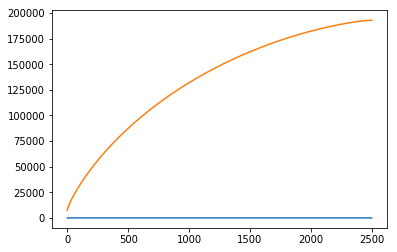

In [14]:
plt.plot(np.log10(power));
sum(power[:1750])
plt.plot(np.cumsum(power));

In [15]:
svs = s[:10]

In [16]:
svV = vh[:10] # concepts (rows) books (columns)
svV  = pd.DataFrame(vh[:10])
svV.columns = rev_df.columns
svV

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
0,0.013190,0.012825,0.013309,0.013311,0.013311,0.013169,0.013135,0.013182,0.013207,0.013165,...,0.013335,0.013440,0.013434,0.013407,0.013393,0.013467,0.013451,0.013351,0.013321,0.013362
1,-0.007601,0.015728,-0.010550,0.018274,0.012671,0.006980,-0.010557,0.015265,0.012669,0.012611,...,-0.010498,0.015552,0.009767,0.015530,0.012783,0.018460,0.015557,-0.010504,-0.007452,-0.007624
2,-0.001839,-0.001831,-0.002213,0.001638,0.004061,-0.000386,-0.002077,-0.000331,-0.002002,-0.001294,...,-0.002176,0.001641,0.000879,0.001606,0.000956,0.002088,0.001683,-0.001974,-0.001951,-0.001540
3,-0.006296,-0.017343,-0.005268,-0.017367,-0.012631,-0.013254,-0.005413,-0.018227,-0.015595,-0.015439,...,-0.004833,-0.015065,-0.012679,-0.015439,-0.014183,-0.016103,-0.015020,-0.004725,-0.005324,-0.005889
4,-0.000220,-0.003993,-0.000456,-0.001918,-0.003654,-0.002072,0.000282,-0.001841,-0.002628,0.000394,...,-0.000187,-0.001108,-0.000949,-0.001403,-0.000590,-0.001245,-0.001152,-0.000212,-0.000509,-0.000362
5,0.001257,-0.003333,-0.000472,-0.003242,-0.005431,-0.001909,0.000803,-0.007506,-0.006710,-0.003830,...,-0.000238,-0.002963,-0.002226,-0.002763,-0.003442,-0.003182,-0.002886,-0.000084,-0.000258,-0.000337
6,-0.003226,-0.008846,-0.003254,-0.005625,-0.004617,-0.005579,-0.003399,-0.002220,-0.002826,-0.004452,...,-0.003054,-0.003928,-0.003817,-0.004318,-0.002741,-0.004060,-0.003997,-0.003134,-0.003766,-0.003349
7,-0.001078,-0.002601,-0.001030,-0.001376,-0.002243,-0.001477,0.001321,-0.002869,-0.001939,-0.001015,...,-0.000651,-0.000091,-0.000224,-0.000396,-0.000402,-0.000065,-0.000101,-0.000617,-0.000947,-0.000524
8,0.000301,0.000342,0.002454,0.002392,0.001770,0.001990,0.003322,0.004434,0.002192,0.002318,...,0.001799,0.002210,0.002230,0.002187,0.002804,0.002261,0.002269,0.002214,0.001671,0.002186
9,-0.000315,-0.000705,0.000576,0.001807,0.000908,0.001536,0.000753,-0.000025,-0.000403,0.001513,...,0.000225,0.000936,0.000901,0.001325,0.000778,0.001046,0.000976,0.000544,0.000687,0.000589


In [17]:
sv0 = svV.iloc[0,:].nlargest(20)

In [18]:
sv1 = svV.iloc[1,:].nlargest(20)

In [19]:
sv2 = svV.iloc[2,:].nlargest(10)

In [20]:
meta_data = pd.read_csv('/Users/sarahburgart/galvanize/week7/svd/data/book_meta.csv', sep=";", error_bad_lines=False, encoding='latin1')


/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
slist = []

In [22]:
meta_data[meta_data["ISBN"] =='0312195516']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,two,three
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN,NaN


In [23]:
sv0 = svV.iloc[0,:].nlargest(20)

books0 = []
for book in sv0.index:
    books0.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    
boo = [str(x) for x in books0]
list(enumerate(boo))

slist.append(("s0", "German"))

In [24]:
#meta_data[meta_data["ISBN"] ==book]["Book-Title"]

In [25]:
sv1 = svV.iloc[1,:].nlargest(20)
books1 = []
for book in sv1.index:
    books1.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    

boo = [str(x) for x in books1]
list(enumerate(boo))

slist.append(("s1", "Oprah Recommended, Fantasy, Biographies"))

In [26]:
books1 = []
for book in sv1.index:
    books1.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)

In [27]:
books1
boo = [str(x) for x in books1]
list(enumerate(boo))

[(0, "['The Red Tent (Bestselling Backlist)']"),
 (1, "['The Lovely Bones: A Novel']"),
 (2, "['The Da Vinci Code']"),
 (3, '["Where the Heart Is (Oprah\'s Book Club (Paperback))"]'),
 (4, "['Two for the Dough']"),
 (5, "['Snow Falling on Cedars']"),
 (6, '["Harry Potter and the Sorcerer\'s Stone (Harry Potter (Paperback))"]'),
 (7, "['1st to Die: A Novel']"),
 (8, "['Good in Bed']"),
 (9,
  '["Tuesdays with Morrie: An Old Man, a Young Man, and Life\'s Greatest Lesson"]'),
 (10, "['The Five People You Meet in Heaven']"),
 (11, "['Lucky : A Memoir']"),
 (12, "['A Prayer for Owen Meany']"),
 (13, "['House of Sand and Fog']"),
 (14, "['Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))']"),
 (15, "['B Is for Burglar (Kinsey Millhone Mysteries (Paperback))']"),
 (16, "['White Oleander : A Novel']"),
 (17, '["The Sweet Potato Queens\' Book of Love"]'),
 (18,
  "['Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)']"),
 (19, '["Bridget Jones\'s Diary"]')]

In [28]:
sv2 = svV.iloc[2,:].nlargest(10)

books2 = []
for book in sv2.index:
    books2.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    
boo = [str(x) for x in books2]
list(enumerate(boo))

slist.append(("s2", "Irish Triologies"))

In [29]:
sv3 = svV.iloc[3,:].nlargest(20)

books3 = []
for book in sv3.index:
    books3.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    
boo = [str(x) for x in books3]
list(enumerate(boo))

slist.append(("s3","Oprah, Grisham, Fantasy, Bestsellers"))

In [30]:
sv4 = svV.iloc[4,:].nlargest(10)
books4 = []
for book in sv4.index:
    books4.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    
boo = [str(x) for x in books4]
list(enumerate(boo))

slist.append(("s4", "Grisham, Mystery"))

In [31]:
slist.pop(0)

('s0', 'German')

In [32]:
slist.pop(1)


('s2', 'Irish Triologies')

In [33]:
slist.pop(3)

IndexError: pop index out of range

In [ ]:
slist

In [ ]:
sv0 = svV.iloc[0,:].nlargest(10)

books0 = []
for book in sv0.index:
    books0.append(meta_data[meta_data["ISBN"] ==book]["Book-Title"].values)
    
boo = [str(x) for x in books0]
list(enumerate(boo))

In [ ]:
slist

In [ ]:
u[0][:5]

In [ ]:
U = u[:5,:5]
U.shape

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title("$U$")
sns.heatmap( U, square=True, annot=True, cbar=False, xticklabels=False, ax=ax )
plt.show()